This activity is adapted from the Scikit-Learn example at https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Introduction to regression: Diabetes dataset

First we load our dataset. This is a built-in dataset that is part of the Scikit-Learn library. So, there is no external file to load and parse.

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

## What are we working with?
Let's look at the structure of our data. The data structure returned from our load_diabetes() method is a dictionary. Let's see what the keys are.

In [2]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


What are the features?

In [3]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


What do some of the feature vectors look like?

In [4]:
print(diabetes['data'][:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


Can also access the *data* and *target* through class fields `data` and `target`

In [5]:
print(diabetes.data[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


What is the output for the first few instances?

In [6]:
print(diabetes.target[:5])

[151.  75. 141. 206. 135.]


## What's with our feature values?
The output looks like what we saw in the original data set, but the attributes do not. 

For instance, for the first patient, their age is 0.038 and their gender is 0.05? 

*What's going on?*

According to the documentation, the data has been scaled so each attribute has zero mean and a variance of 1. 

https://web.stanford.edu/~hastie/Papers/LARS/diabetes.sdata.txt

This is a common scaling technique (*Standard scaling*). 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

We will talk more about different transformation techniques that we can apply to our data in the future.  Here we have some features with large values such as 80-130 (BP) and other others with small values such as 1-2 (sex). We can get poor performance if our attributes have significantly different ranges.

## Only use one feature
For an example that is easy to visualize, we will just use one of the features (BMI). Ignoring the other features will mostly likely give us worse predictions. But our goal is to understand what is going on at this point.



In [7]:
# Use only one feature (BMI). BMI is column 3 (index=2) of the feature vectors.
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [8]:
print(diabetes_X[:5])

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


## Split our dataset
We need to split our dataset into *training* and *test* sets. 

We split both the feature vectors (`data`) and the output (`target`).


*  Training set: used for *learning* the model
*   Test set: used for *evaluating* our trained model



In [9]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes.target, train_size=0.8, random_state=0)

print('Training set size: {}'.format(len(diabetes_X_train)))
print('Test set size: {}'.format(len(diabetes_X_test)))

Training set size: 353
Test set size: 89


## Create instance of the model object
Before training, we must create an instance of our linear regression class.

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()

## Train the model
We train the model on our training set. 

With Scikit-Learn, *training* is done using the `fit(x,y)` function, where `x` is the list of training feature vectors (*input*) and `y` is the corresponding list of target values (*output*). 

All classifier and regressor classes inherit the `fit` function.

In [11]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [12]:
# The coefficients for our line
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [981.65543614]


## Evaluate the mode (Is it good?)
How good is our model in practice? 

Training gives us a model that minimizes error on the training set. But, if the training set is not representative of the real world, then the model will do poorly in practice.

In [13]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

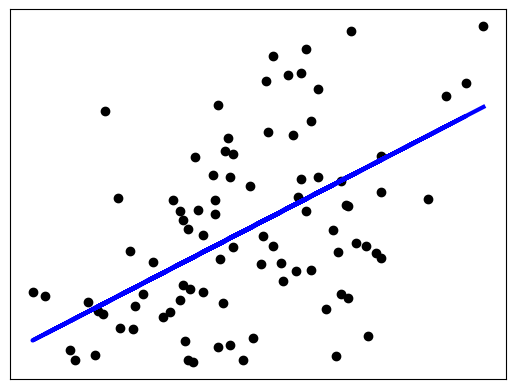

In [14]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Measuring error
While plots are nice, there are many possible lines that fit the data. Some better than others. Visually, it can be difficult to tell which is a better fit. 

We would like to quantify the error. For this, we will use the *Root Mean Square Error* (RMSE).

$$ error = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}{(predicted_i - correct_i)^2}} $$


Scikit-Learn has a function for calculating *mean squared error* (MSE). To get RMSE, we just compute the square root of the value returned by this function.



In [15]:
# The root mean squared error (RMSE)
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))

Root mean squared error: 64.43


## Use all features?
With this example, we only used one of the 10 attributes (or features). What if our model used all 10? 

In [16]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes.data, diabetes.target, train_size=0.8, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The root mean squared error (RMSE)
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))

Root mean squared error: 58.52


# Homework 2 (part 2) - Regression with synthetic data 
At times ML practitioners work with *synthetic* or data generated using a given mathematical model. 

The use of synthetic data allows practioners to control the characteristics of the datasets in order learn the capabilities and limits of given ML algorithms. 

Here, you will use a model to generate a dataset. Then you will perform regression on this dataset.

## (1) Generate the data
Scikit-learn has various generators for creating datasets with different properties. 

We will use the `make_regression` function for creating a dataset for testing regression algorithms.

For details on `make_regression` see:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

### About the data
Our data will have the following properties.
1. Number of samples (`n_samples`): 1000
2. Number of features (`n_features`): 1 
3. Number of output values (`n_targets`): 1
4. Standard deviation of gaussian noise added to generated points (`noise`): 5.0

We are just generating one feature per sample for the sake of this exercise, so we can easily visualize our data.

In [17]:
from sklearn.datasets import make_regression

# !!! Take note of the following statement. !!!
# You will use it later in the lab for datasets with different noise values.
data, targets = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=5.0)

## (2) What does our data look like?

Display the features for the first 5 points.

In [26]:
print(data[:5])

[[-1.20944293]
 [-1.45527327]
 [-0.17808721]
 [-0.23870904]
 [-2.06318427]]


Display the output (i.e. targets) for the first 5 points.

In [27]:
print(targets[:5])

[ -62.60550359  -79.72480927    0.495777    -19.94525393 -112.57979633]


## (3) Split the data
Split the dataset into training (80%) and test (20%) sets. 

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(data, targets, train_size=0.8, random_state=0)

Display the sizes of the training and test sets.

*(you should have 800 training instances and 200 test instances)*

In [30]:
print('Training set size: {}'.format(len(data_train)))
print('Test set size: {}'.format(len(data_test)))

Training set size: 800
Test set size: 200


## (4) Train the model
Train a linear regression model on your training set.

In [31]:
# create the model
regr = linear_model.LinearRegression()


In [32]:
# train model
regr.fit(data_train, targets_train)


LinearRegression()

## (5) Evaluate the trained model
Output your model's error (RMSE) on the test set.

In [33]:
# Make predictions using the testing set
targets_pred = regr.predict(data_test)

# The root mean squared error (RMSE)
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(targets_test, targets_pred)))



Root mean squared error: 4.96


As we did earlier with the diabetes dataset, plot the samples in the test set along with the predicted values.

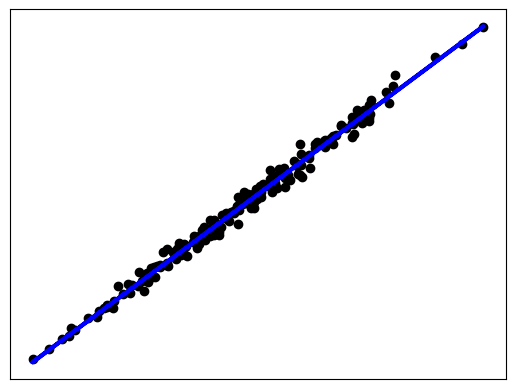

In [40]:
# Plot outputs

plt.scatter(data_test, targets_test,  color='black')
plt.plot(data_test, targets_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


## (6) Repeat with different amounts of noise

Repeat the steps you just did with data generated with `noise=10.0` and `noise=0.5`.

1. What is the error with data generated with noise = 10.0?


Root mean squared error: 10.01


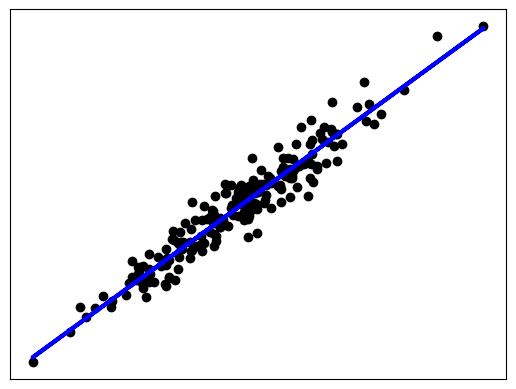

In [47]:
# create the data
from sklearn.datasets import make_regression
data, targets = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=10.0)

# split the data
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(data, targets, train_size=0.8, random_state=0)

# create the model
regr = linear_model.LinearRegression()

# train model
regr.fit(data_train, targets_train)

# Make predictions using the testing set
targets_pred = regr.predict(data_test)

# The root mean squared error (RMSE)
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(targets_test, targets_pred)))

# Plot outputs
plt.scatter(data_test, targets_test,  color='black')
plt.plot(data_test, targets_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

2. What is the error with data generated with noise = 0.5?

Root mean squared error: 0.54


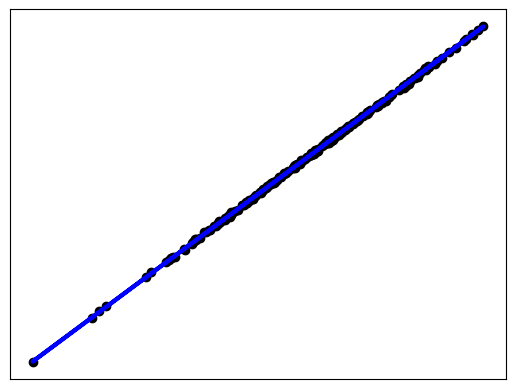

In [52]:
# create the data
from sklearn.datasets import make_regression
data, targets = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=0.5)

# split the data
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(data, targets, train_size=0.8, random_state=0)

# create the model
regr = linear_model.LinearRegression()

# train model
regr.fit(data_train, targets_train)

# Make predictions using the testing set
targets_pred = regr.predict(data_test)

# The root mean squared error (RMSE)
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(targets_test, targets_pred)))

# Plot outputs
plt.scatter(data_test, targets_test,  color='black')
plt.plot(data_test, targets_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


3. Do you notice a pattern with the error with these three experiments?


Yes the error has a proportional relation to the noise, increases when the noise increases and decreases when it does as well.

## (7) Given the linear model

$$ w = [ -1, 3, 2]^T $$

Suppose our features are $x_0$ = 1, $x_1$ = age, $x_2$ = BMI, what is the predicted output for the following patient?

- Age = 53
- BMI = 27



212